In [3]:
import pickle
import copy

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv('.//LRBF-2/LRBF-2/data/input_output.csv')


In [5]:
df

,name,Npoints,Nboundary,ri,re,xcenter,ycenter,number,c,eig1,eig2,eig3,eig4
0,1,100,100,0.200000,10,7.340740,-4.935545,20,0.2,0.086835,0.205047,0.217693,0.394798
1,2,100,100,0.209309,10,-8.633278,-1.806293,20,0.2,0.089757,0.208017,0.219528,0.401879
2,3,100,100,0.218619,10,-2.527040,-7.758822,20,0.2,0.088745,0.211512,0.219823,0.393512
3,4,100,100,0.227928,10,9.139652,-0.637795,20,0.2,0.090136,0.205796,0.219625,0.393025
4,5,100,100,0.237237,10,-7.321746,-4.218163,20,0.2,0.088790,0.205965,0.219218,0.392779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,100,100,9.462763,10,-0.236382,-0.339796,20,0.2,6.288588,6.333078,6.440969,6.580474
996,997,100,100,9.472072,10,0.361274,-0.020281,20,0.2,6.736554,6.910631,7.249757,7.427355
997,998,100,100,9.481381,10,0.422731,0.068112,20,0.2,6.235476,6.365920,6.499170,6.727749
998,999,100,100,9.490691,10,-0.037546,-0.398810,20,0.2,6.172188,6.383114,6.457401,6.527400


In [6]:
X = df[["xcenter", "ycenter", "ri"]]
Y = df[["eig1", "eig2", "eig3", "eig4"]]

In [7]:
X

,xcenter,ycenter,ri
0,7.340740,-4.935545,0.200000
1,-8.633278,-1.806293,0.209309
2,-2.527040,-7.758822,0.218619
3,9.139652,-0.637795,0.227928
4,-7.321746,-4.218163,0.237237
...,...,...,...
995,-0.236382,-0.339796,9.462763
996,0.361274,-0.020281,9.472072
997,0.422731,0.068112,9.481381
998,-0.037546,-0.398810,9.490691


In [8]:
Y

,eig1,eig2,eig3,eig4
0,0.086835,0.205047,0.217693,0.394798
1,0.089757,0.208017,0.219528,0.401879
2,0.088745,0.211512,0.219823,0.393512
3,0.090136,0.205796,0.219625,0.393025
4,0.088790,0.205965,0.219218,0.392779
...,...,...,...,...
995,6.288588,6.333078,6.440969,6.580474
996,6.736554,6.910631,7.249757,7.427355
997,6.235476,6.365920,6.499170,6.727749
998,6.172188,6.383114,6.457401,6.527400


## Train-Validation-Test Split

In [9]:
X_train, X_valid_test, Y_train, Y_valid_test = train_test_split(
    X, Y, test_size=0.3, random_state=25
)

In [10]:
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid_test, Y_valid_test, test_size=0.33, random_state=25)

## Train Model

In [10]:
r2_max = 0.0
for n_layer in range(3, 8):
    for n_node in range(15, 20):
        mlp = MLPRegressor(
            hidden_layer_sizes=tuple([n_node for i in range(n_layer)]),  
            activation="relu",
            solver="adam",
            alpha=1e-4,
            learning_rate_init=1e-3,
            max_iter=5000,
            early_stopping=True,
            validation_fraction=0.15,
            n_iter_no_change=30,
            random_state=25
        )
        
        model = Pipeline([
            ("x_scaler", StandardScaler()),
            ("reg", TransformedTargetRegressor(
                regressor=mlp,
            ))
        ])
        
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_valid)
        
        mse = mean_squared_error(Y_valid, Y_pred)
        r2 = r2_score(Y_valid, Y_pred)
        
        
        file_name = f"./models/ann_{n_layer}layer_{n_node}node_{r2:.4f}r2.sav"
        
        if (r2>0.99 and mse<0.01):
            print(f"mse: {mse},   r2: {r2},   n_node: {n_node},   n_layer: {n_layer}")
            pickle.dump(model, open(file_name, 'wb'))
            
            if r2 > r2_max:
                r2_max, layer_max, node_max = r2, n_layer, n_node
print(f"r2_max: {r2_max}, n_layer: {layer_max}, n_node: {node_max}")

mse: 0.009358168851163428,   r2: 0.9949389378148906,   n_node: 19,   n_layer: 5
mse: 0.008883677193415975,   r2: 0.9951847836582797,   n_node: 18,   n_layer: 6
mse: 0.008349809366971562,   r2: 0.995484953538125,   n_node: 16,   n_layer: 7
r2_max: 0.995484953538125, n_layer: 7, n_node: 16


## Plots

In [11]:
load_model = pickle.load(open("./models/ann_7layer_16node_0.9955r2.sav", 'rb'))

In [12]:
load_model

Pipeline(steps=[('x_scaler', StandardScaler()),
                ('reg',
                 TransformedTargetRegressor(regressor=MLPRegressor(early_stopping=True,
                                                                   hidden_layer_sizes=(16,
                                                                                       16,
                                                                                       16,
                                                                                       16,
                                                                                       16,
                                                                                       16,
                                                                                       16),
                                                                   max_iter=5000,
                                                                   n_iter_no_change=30,
                                                                   random_state=25,
                                                                   validation_fraction=0.15)))])

In [13]:
mlp = load_model.named_steps["reg"].regressor_

In [14]:
mlp

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(16, 16, 16, 16, 16, 16, 16), max_iter=5000,
             n_iter_no_change=30, random_state=25, validation_fraction=0.15)

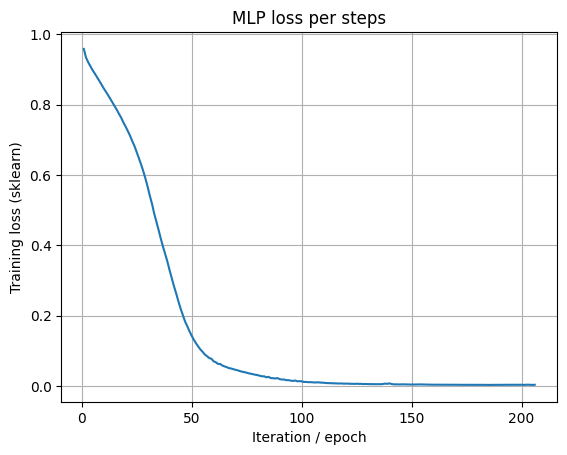

In [15]:
loss_steps = mlp.loss_curve_

plt.figure()
plt.plot(range(1, len(loss_steps) + 1), loss_steps)
plt.xlabel("Iteration / epoch")
plt.ylabel("Training loss (sklearn)")
plt.title("MLP loss per steps")
plt.grid(True)
plt.show()

In [16]:
Y_pred = load_model.predict(X_valid)

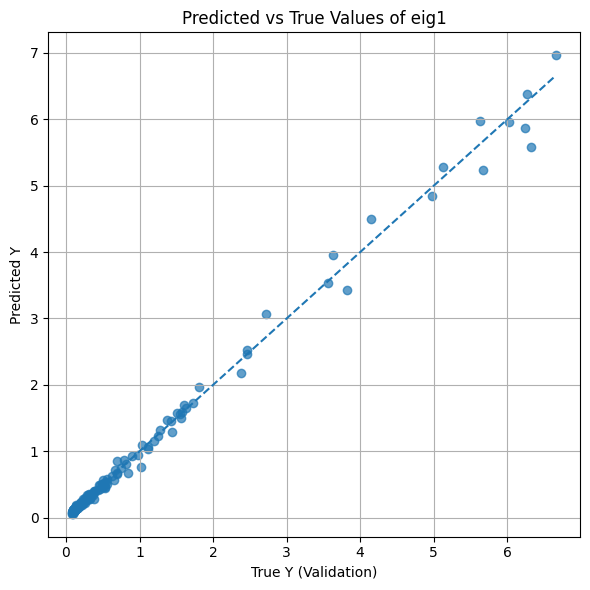

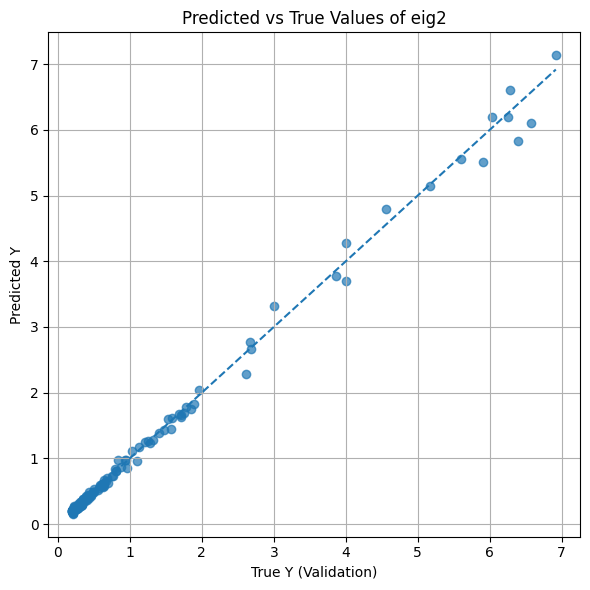

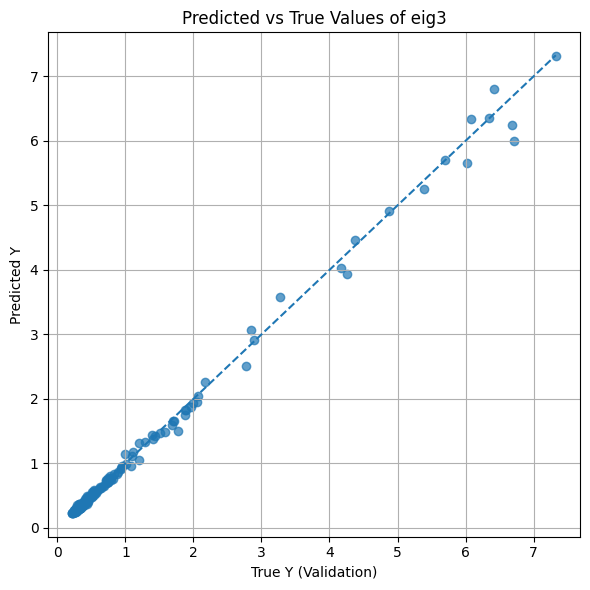

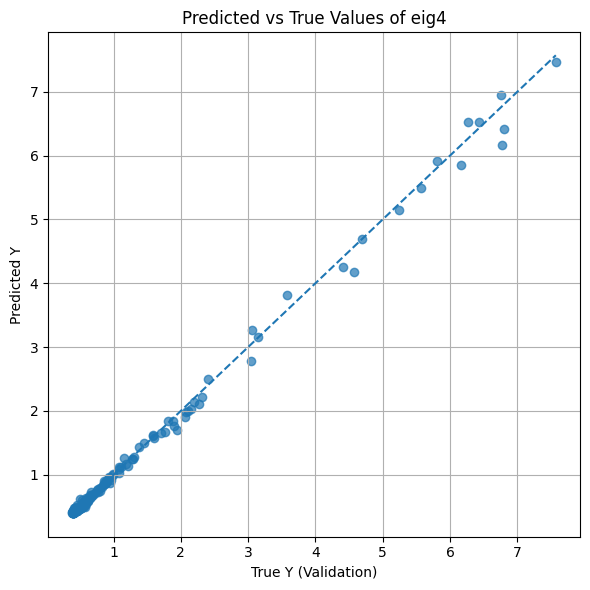

In [19]:
for i in range(4):
    plt.figure(figsize=(6, 6))
    plt.scatter(Y_valid[f"eig{i+1}"], Y_pred[:, i], alpha=0.7)
    plt.plot(
        [Y_valid[f"eig{i+1}"].min(), Y_valid[f"eig{i+1}"].max()],
        [Y_valid[f"eig{i+1}"].min(), Y_valid[f"eig{i+1}"].max()],
        linestyle="--"
    )
    
    plt.xlabel("True Y (Validation)")
    plt.ylabel("Predicted Y")
    plt.title(f"Predicted vs True Values of eig{i+1}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Bonferroni Correction

In [21]:
y_pred_eig1 = Y_pred[:, 0]
y_pred_eig2 = Y_pred[:, 1]
y_pred_eig3 = Y_pred[:, 2]
y_pred_eig4 = Y_pred[:, 3]

In [24]:
overal_precision = (1 - mean_squared_error(Y_valid["eig1"], y_pred_eig1)) * \
                   (1 - mean_squared_error(Y_valid["eig2"], y_pred_eig2)) * \
                   (1 - mean_squared_error(Y_valid["eig3"], y_pred_eig3)) * \
                   (1 - mean_squared_error(Y_valid["eig4"], y_pred_eig4))
overal_precision

0.9670145393913233

# As we decided to keep r2 upper than 0.99 then we could keep overall_precision over 0.95

## Ablation

In [22]:
def ablate_neuron(model, layer, neuron, X_valid, Y_valid):
    m = copy.deepcopy(model)
    mlp = m.named_steps["reg"].regressor_
    
    out_w = mlp.coefs_[layer+1]
    out_w[neuron, :] = 0

    Y_pred_ablate = m.predict(X_valid)
    m.mse_ablate = mean_squared_error(Y_valid, Y_pred_ablate)
    m.r2_ablate = r2_score(Y_valid, Y_pred_ablate)

    print(f"mse ablate layer {layer} neuron {neuron}: {m.mse_ablate}")
    print(f"r2_score ablate layer {layer} neuron {neuron}: {m.r2_ablate}\n")

    return m.mse_ablate, m.r2_ablate

In [24]:
for l in range(7):
    for n in range(16):
        mse, r2 = ablate_neuron(load_model, l, n, X_valid, Y_valid)
        if r2>0.995 and mse<0.009:
            mlp = load_model.named_steps["reg"].regressor_
            mlp.coefs_[l+1][n, :] = 0

mse ablate layer 0 neuron 0: 0.18796999708329584
r2_score ablate layer 0 neuron 0: 0.8985518200827701

mse ablate layer 0 neuron 1: 0.0938637005873495
r2_score ablate layer 0 neuron 1: 0.9496087663720388

mse ablate layer 0 neuron 2: 0.008353576662866059
r2_score ablate layer 0 neuron 2: 0.9954828862116739

mse ablate layer 0 neuron 3: 0.11630761380447967
r2_score ablate layer 0 neuron 3: 0.9374603862024813

mse ablate layer 0 neuron 4: 0.008353576662866059
r2_score ablate layer 0 neuron 4: 0.9954828862116739

mse ablate layer 0 neuron 5: 0.026746067618176467
r2_score ablate layer 0 neuron 5: 0.985631428998311

mse ablate layer 0 neuron 6: 0.9367686505993089
r2_score ablate layer 0 neuron 6: 0.4970490946347795

mse ablate layer 0 neuron 7: 0.07520282472797361
r2_score ablate layer 0 neuron 7: 0.9596923640819534

mse ablate layer 0 neuron 8: 0.014527108728978949
r2_score ablate layer 0 neuron 8: 0.992147384586075

mse ablate layer 0 neuron 9: 0.5812907638509274
r2_score ablate layer 0 n

In [28]:
r2_score(Y_valid, load_model.predict(X_valid))

0.9953163258656382

## Evaluation

In [29]:
r2_score(Y_test, load_model.predict(X_test))

0.9966275085661216

In [30]:
mean_squared_error(Y_test, load_model.predict(X_test))

0.006830709129108256